In [2]:
import pandas as pd

# Load the dataset
file_path = r"C:\Users\amena\OneDrive - ESPRIT\Bureau\data\Historique_Vols_Clients_10000.csv"
df = pd.read_csv(file_path)

# Display basic information about the dataset
df.info(), df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 1 columns):
 #   Column                                                                                                                               Non-Null Count  Dtype 
---  ------                                                                                                                               --------------  ----- 
 0   ID Client;Compagnie;Pays de départ;Pays de destination;Date de départ;Heure de départ;Date de retour;Heure d'arrivée;Durée;Prix (€)  10000 non-null  object
dtypes: object(1)
memory usage: 78.2+ KB


(None,
   ID Client;Compagnie;Pays de départ;Pays de destination;Date de départ;Heure de départ;Date de retour;Heure d'arrivée;Durée;Prix (€)
 0  725;Turkish Airlines;Turquie;Tunisie;27/02/202...                                                                                 
 1  1954;Tunisair;Turquie;Tunisie;05/06/2024;02:55...                                                                                 
 2  294;Turkish Airlines;Turquie;Tunisie;08/09/202...                                                                                 
 3  1704;Nouvelair;Turquie;Tunisie;13/02/2024;12:5...                                                                                 
 4  289;Tunisair;Turquie;Tunisie;22/08/2024;12:35;...                                                                                 )

In [3]:

df.nunique()


ID Client;Compagnie;Pays de départ;Pays de destination;Date de départ;Heure de départ;Date de retour;Heure d'arrivée;Durée;Prix (€)    10000
dtype: int64

In [4]:
# Reload the dataset with the correct separator
df = pd.read_csv(file_path, sep=';')

# Display basic information again
df.info(), df.head()




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID Client            10000 non-null  int64 
 1   Compagnie            10000 non-null  object
 2   Pays de départ       10000 non-null  object
 3   Pays de destination  10000 non-null  object
 4   Date de départ       10000 non-null  object
 5   Heure de départ      10000 non-null  object
 6   Date de retour       10000 non-null  object
 7   Heure d'arrivée      10000 non-null  object
 8   Durée                10000 non-null  object
 9   Prix (€)             10000 non-null  object
dtypes: int64(1), object(9)
memory usage: 781.4+ KB


(None,
    ID Client         Compagnie Pays de départ Pays de destination  \
 0        725  Turkish Airlines        Turquie             Tunisie   
 1       1954          Tunisair        Turquie             Tunisie   
 2        294  Turkish Airlines        Turquie             Tunisie   
 3       1704         Nouvelair        Turquie             Tunisie   
 4        289          Tunisair        Turquie             Tunisie   
 
   Date de départ Heure de départ Date de retour Heure d'arrivée       Durée  \
 0     27/02/2024           21:30     07/03/2024           22:30         3 h   
 1     05/06/2024           02:55     19/06/2024           03:50  2 h 55 min   
 2     08/09/2024           21:30     15/09/2024           22:30         3 h   
 3     13/02/2024           12:50     25/02/2024           13:50         3 h   
 4     22/08/2024           12:35     30/08/2024           13:20  2 h 45 min   
 
   Prix (€)  
 0    € 579  
 1    € 363  
 2    € 417  
 3    € 320  
 4    € 286  )

Les données sont bien organisées et concernent les vols entre la Turquie et la Tunisie. Cependant, il y a des opportunités d'amélioration pour optimiser l'analyse, notamment en nettoyant et convertissant les types de données. L’analyse des tendances tarifaires et des habitudes des clients pourrait également être intéressante pour une éventuelle stratégie marketing ou de tarification dynamique.

In [5]:
# Nettoyage de la colonne "Prix (€)" et conversion en numérique
df['Prix (€)'] = df['Prix (€)'].str.replace('€', '').str.replace(',', '').str.strip().astype(float)

# Vérification des valeurs nulles
null_values = df.isnull().sum()

# Analyse des valeurs aberrantes pour le prix (valeurs extrêmement hautes ou basses)
prix_desc = df['Prix (€)'].describe()

# Afficher les résultats
null_values, prix_desc


(ID Client              0
 Compagnie              0
 Pays de départ         0
 Pays de destination    0
 Date de départ         0
 Heure de départ        0
 Date de retour         0
 Heure d'arrivée        0
 Durée                  0
 Prix (€)               0
 dtype: int64,
 count    10000.000000
 mean       241.039500
 std        128.793041
 min         76.000000
 25%        158.000000
 50%        221.000000
 75%        295.000000
 max       2039.000000
 Name: Prix (€), dtype: float64)

Les prix des billets varient fortement, avec une médiane de 221 € et un maximum atteignant 2039 €. Les prix élevés influencent la moyenne, et une analyse plus approfondie des outliers serait utile pour éviter que ces valeurs extrêmes ne biaisent les conclusions

In [6]:
import numpy as np

# Fonction pour convertir la durée en minutes
def convert_duration_to_minutes(duration):
    parts = duration.split()
    minutes = 0
    for i in range(len(parts)):
        if parts[i] == 'h':
            minutes += int(parts[i-1]) * 60
        elif parts[i] == 'min':
            minutes += int(parts[i-1])
    return minutes

# Appliquer la conversion
df['Durée (min)'] = df['Durée'].apply(convert_duration_to_minutes)

# Analyse des valeurs aberrantes pour la durée des vols
duree_desc = df['Durée (min)'].describe()

# Vérifier les valeurs aberrantes (vols trop longs ou trop courts)
outliers_duree = df[(df['Durée (min)'] < 30) | (df['Durée (min)'] > 600)]

# Afficher les résultats
duree_desc, outliers_duree


(count    10000.000000
 mean       239.840500
 std        267.514202
 min         75.000000
 25%        145.000000
 50%        165.000000
 75%        180.000000
 max       1625.000000
 Name: Durée (min), dtype: float64,
       ID Client         Compagnie Pays de départ Pays de destination  \
 100        1769        Air France         Italie             Tunisie   
 123        1579        Air France         Italie             Tunisie   
 201        1749        Air France        Espagne             Tunisie   
 202         863        Air France        Espagne             Tunisie   
 203        1098  Turkish Airlines        Espagne             Tunisie   
 ...         ...               ...            ...                 ...   
 9823       1614       ITA Airways        Espagne             Tunisie   
 9825        784  Turkish Airlines        Espagne             Tunisie   
 9832        211       ITA Airways        Espagne             Tunisie   
 9839         59       ITA Airways        Espagne 

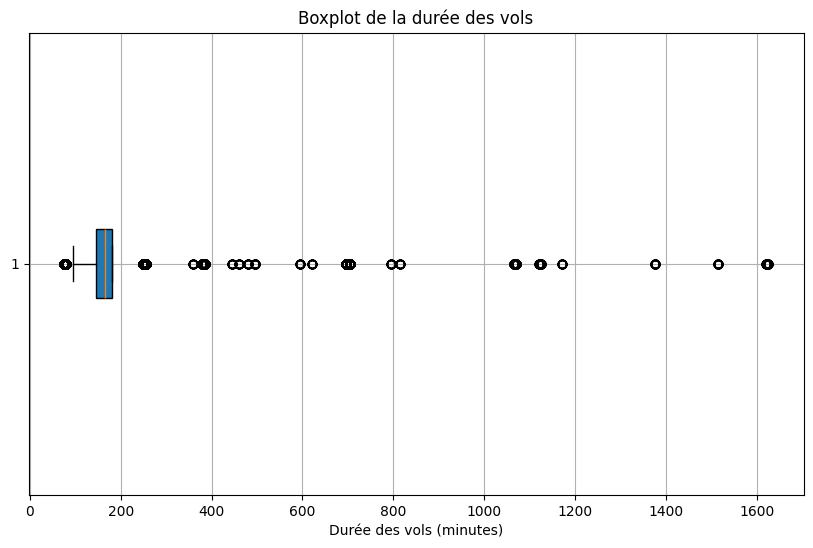

In [7]:
import matplotlib.pyplot as plt

# Création d'un boxplot pour la durée des vols
plt.figure(figsize=(10, 6))
plt.boxplot(df['Durée (min)'], vert=False, patch_artist=True)
plt.xlabel("Durée des vols (minutes)")
plt.title("Boxplot de la durée des vols")
plt.grid(True)

# Afficher le graphique
plt.show()


La plupart des vols ont une durée classique de 2 à 3 heures, mais il existe de nombreuses valeurs aberrantes qui méritent une investigation approfondie. Ces valeurs extrêmes peuvent avoir un impact significatif sur l’analyse et doivent être examinées avec attention

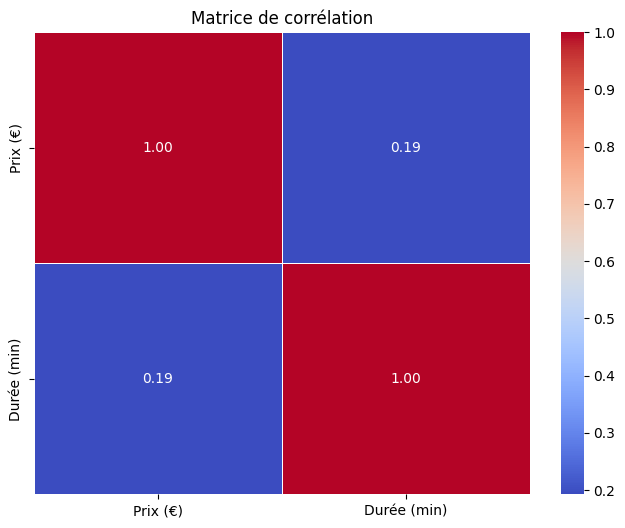

In [8]:
import seaborn as sns

# Sélectionner uniquement les colonnes numériques pour la corrélation
df_numeric = df[['Prix (€)', 'Durée (min)']]

# Calcul de la matrice de corrélation
correlation_matrix = df_numeric.corr()

# Affichage du heatmap de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.show()


La durée du vol n’a qu’un faible impact sur son prix, ce qui indique que d’autres facteurs jouent un rôle majeur dans la tarification des billets. Il serait intéressant d’approfondir cette analyse avec d’autres variables 


📌 Basic Information

Shape of dataset: (10000, 10)
ID Client               int64
Compagnie              object
Pays de départ         object
Pays de destination    object
Date de départ         object
Heure de départ        object
Date de retour         object
Heure d'arrivée        object
Durée                  object
Prix (€)               object
dtype: object

📌 Total Duplicate Rows: 0


📌 Numerical Summary

          ID Client
count  10000.000000
mean    1005.865400
std      576.310571
min        1.000000
25%      506.000000
50%     1005.000000
75%     1505.250000
max     1999.000000

📌 Categorical Summary

       Compagnie Pays de départ Pays de destination Date de départ  \
count      10000          10000               10000          10000   
unique         9              4                   1            365   
top     Tunisair        Turquie             Tunisie     06/07/2024   
freq        3298           2550               10000             42   

       Heure de départ Date d

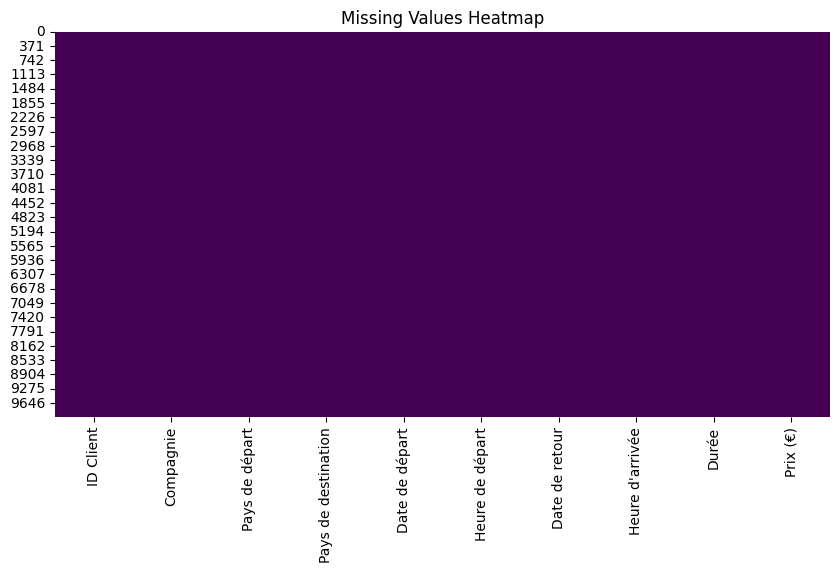

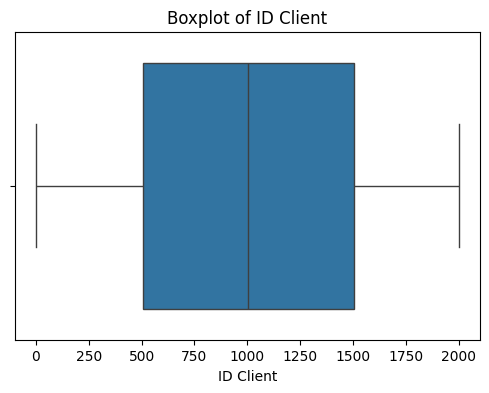


📌 Final Data Discovery Report

╒════╤═════════════════════╤════════╤══════════════════════╤═════════════════╤════════════╕
│    │ Column Name         │ Type   │ Missing Values (%)   │   Unique Values │ Outliers   │
╞════╪═════════════════════╪════════╪══════════════════════╪═════════════════╪════════════╡
│  0 │ ID Client           │ int64  │ 0.00%                │            1982 │ 0          │
├────┼─────────────────────┼────────┼──────────────────────┼─────────────────┼────────────┤
│  1 │ Compagnie           │ object │ 0.00%                │               9 │ N/A        │
├────┼─────────────────────┼────────┼──────────────────────┼─────────────────┼────────────┤
│  2 │ Pays de départ      │ object │ 0.00%                │               4 │ N/A        │
├────┼─────────────────────┼────────┼──────────────────────┼─────────────────┼────────────┤
│  3 │ Pays de destination │ object │ 0.00%                │               1 │ N/A        │
├────┼─────────────────────┼────────┼───────────

In [10]:

# Enhanced Data Discovery Report

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate

# Load dataset
file_path = r"C:\Users\amena\OneDrive - ESPRIT\Bureau\data\Historique_Vols_Clients_10000.csv"  # Ensure this file exists in your environment
df = pd.read_csv(file_path, delimiter=";", encoding="utf-8", low_memory=False)
df.columns = df.columns.str.strip()  # Clean column names

# 1. Basic Information
print("\n📌 Basic Information\n")
print(f"Shape of dataset: {df.shape}")
print(df.dtypes)

# 2. Missing Values Analysis
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
if not missing_values.empty:
    print("\n📌 Missing Values\n")
    print(missing_values)

# 3. Duplicate Detection
duplicate_count = df.duplicated().sum()
print(f"\n📌 Total Duplicate Rows: {duplicate_count}\n")

# 4. Statistical Summary
print("\n📌 Numerical Summary\n")
print(df.describe())

print("\n📌 Categorical Summary\n")
print(df.describe(include=['object']))

# 5. Outlier Detection using IQR method
numerical_cols = df.select_dtypes(include=['number']).columns
outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outlier_count = ((df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))).sum()
    outliers[col] = outlier_count

print("\n📌 Outlier Detection\n")
for col, count in outliers.items():
    print(f"{col}: {count} outliers detected")

# 6. Data Quality Checks - Spotting Potential Formatting Issues
print("\n📌 Data Quality Checks\n")
for col in df.columns:
    if df[col].dtype == 'object':
        unique_values = df[col].nunique()
        print(f"{col}: {unique_values} unique values")

# 7. Visualizations of Distributions
plt.figure(figsize=(10, 5))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

# Generate a structured report similar to the screenshot
data_discovery_report = pd.DataFrame(columns=[
    "Column Name", "Type", "Missing Values (%)", "Unique Values", "Outliers"
])

for col in df.columns:
    col_type = df[col].dtype  # Get data type
    missing_percent = (df[col].isnull().sum() / len(df)) * 100  # Missing value percentage
    unique_values = df[col].nunique()  # Count of unique values
    outlier_count = outliers.get(col, "N/A")  # Get outlier count if numeric

    data_discovery_report = pd.concat([data_discovery_report, pd.DataFrame([{
        "Column Name": col,
        "Type": col_type,
        "Missing Values (%)": f"{missing_percent:.2f}%",
        "Unique Values": unique_values,
        "Outliers": outlier_count
    }])], ignore_index=True)

# Display the structured report
formatted_report = tabulate(data_discovery_report, headers="keys", tablefmt="fancy_grid")
print("\n📌 Final Data Discovery Report\n")
print(formatted_report)
